## Análisis y gestión de nulos de columnas categóricas

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("..")
from SRC import sp_eda,sp_limpieza,sp_visual
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
df_limpio=pd.read_csv("../Data/mktgeda_datos_limpios.csv")
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209915 entries, 0 to 209914
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   campaign_id       209915 non-null  int64  
 1   company           194734 non-null  object 
 2   campaign_type     191535 non-null  object 
 3   duration          191309 non-null  float64
 4   channel_used      187421 non-null  object 
 5   conversion_rate   200471 non-null  float64
 6   roi               173439 non-null  float64
 7   location          184543 non-null  object 
 8   language          182907 non-null  object 
 9   clicks            178736 non-null  float64
 10  impressions       188467 non-null  float64
 11  engagement_score  186051 non-null  float64
 12  customer_segment  196763 non-null  object 
 13  date              203007 non-null  object 
 14  total($)          201832 non-null  float64
 15  genre             145058 non-null  object 
 16  ages              18

In [3]:
sp_eda.calcular_nulos(df_limpio)[1]

campaign_id          0.000000
company              7.231975
campaign_type        8.755925
duration             8.863588
channel_used        10.715766
conversion_rate      4.498964
roi                 17.376557
location            12.086797
language            12.866160
clicks              14.853155
impressions         10.217469
engagement_score    11.368411
customer_segment     6.265393
date                 3.290856
total($)             3.850606
genre               30.896792
ages                13.631232
year                 3.290856
month                3.290856
day_name             3.290856
quarter              3.290856
dtype: float64

In [4]:
sp_eda.analisis_general_categoricas(df_limpio)

Esta columna tiene 6 valores únicos
company
techcorp               0.201352
alpha_innovations      0.200735
datatech_solutions     0.199703
nexgen_systems         0.199652
innovate_industries    0.198558
Name: proportion, dtype: float64
-------------------------
count       194734
unique           5
top       techcorp
freq         39210
Name: company, dtype: object
-------------------------
Esta columna tiene 6 valores únicos
campaign_type
influencer      0.200642
search          0.200063
email           0.199922
social_media    0.199859
display         0.199514
Name: proportion, dtype: float64
-------------------------
count         191535
unique             5
top       influencer
freq           38430
Name: campaign_type, dtype: object
-------------------------
Esta columna tiene 7 valores únicos
channel_used
email         0.167863
instagram     0.167687
google_ads    0.166998
youtube       0.166988
website       0.166198
facebook      0.164267
Name: proportion, dtype: float64
-------

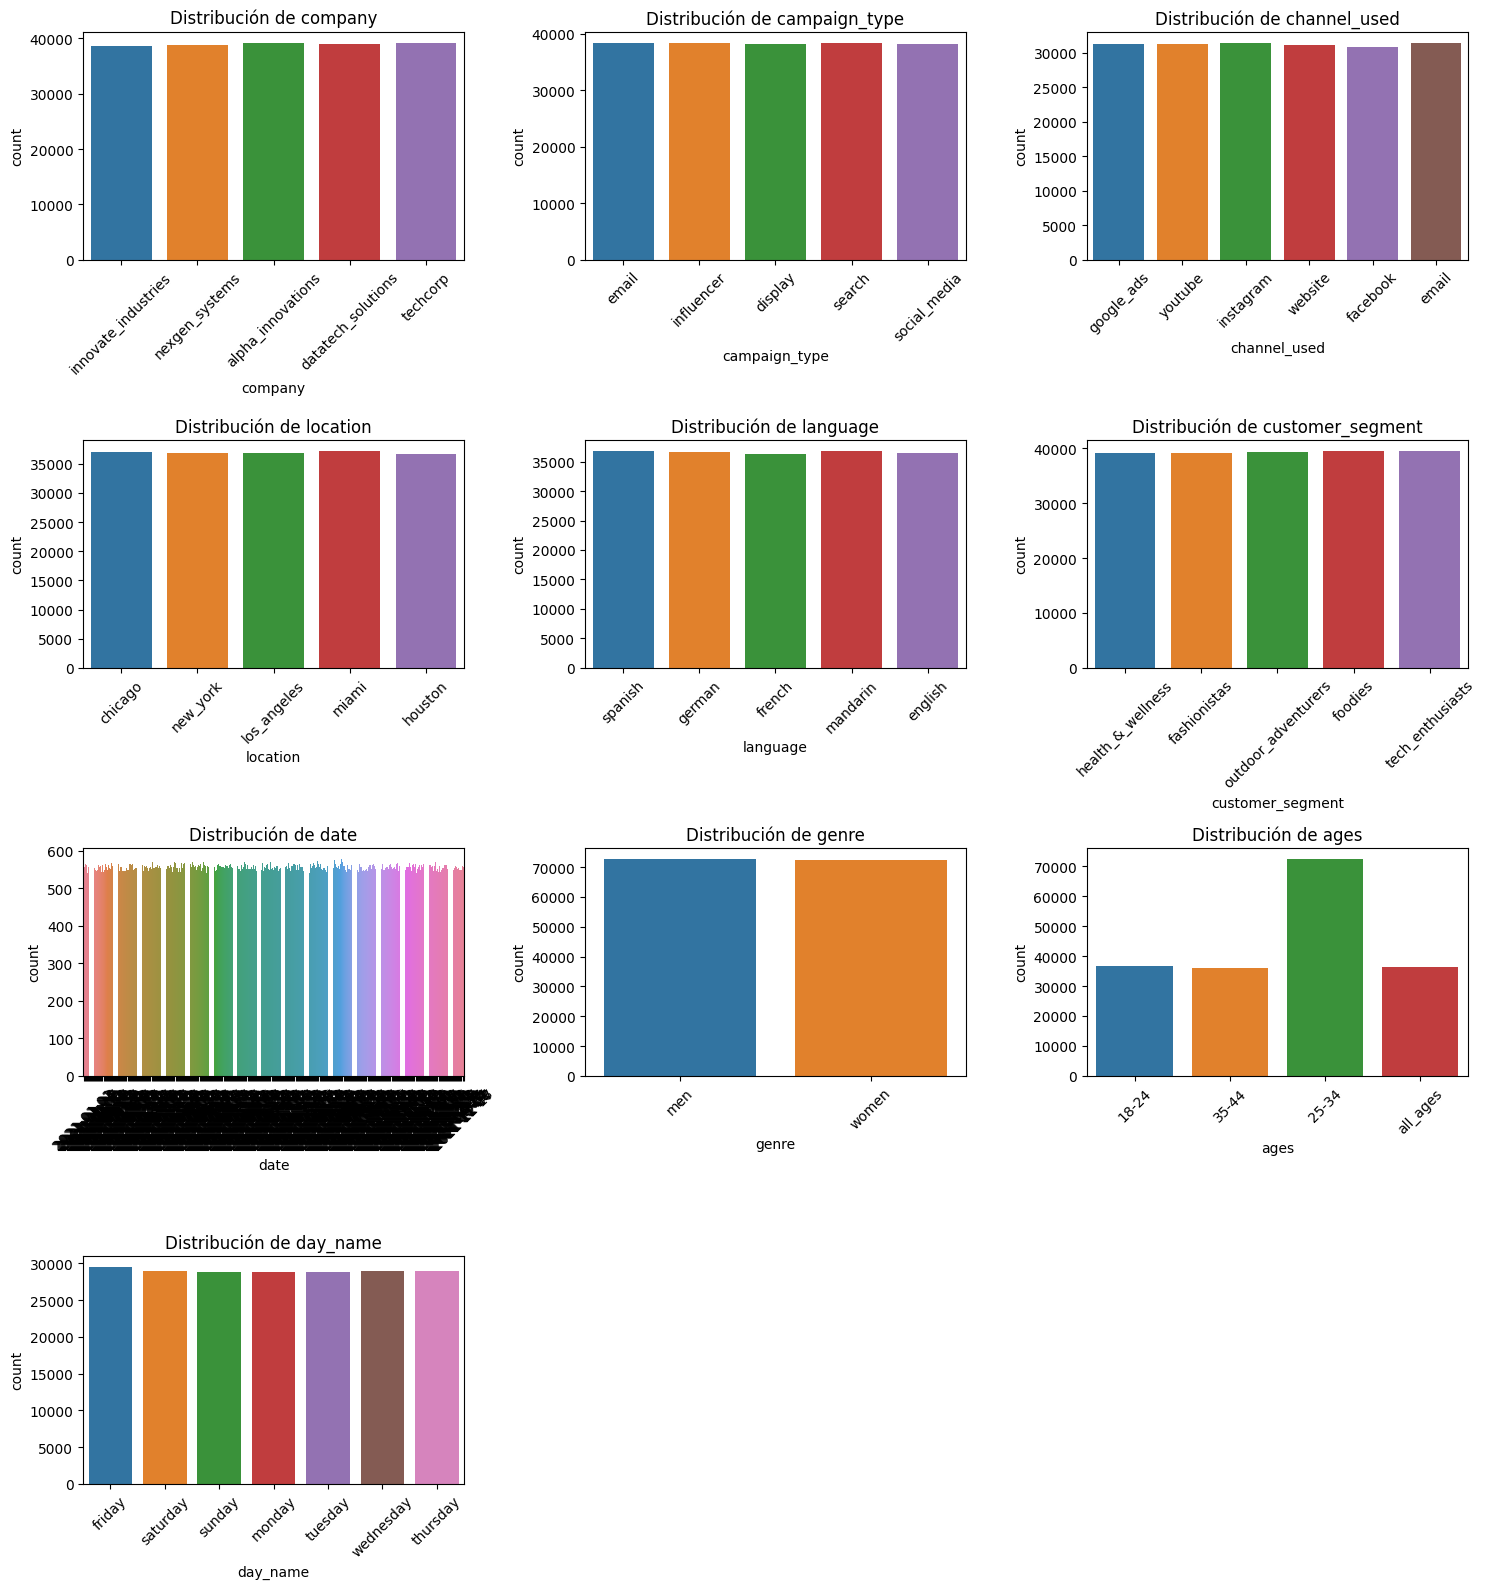

In [5]:
sp_visual.graficar_categoricas(df_limpio)

In [6]:
df_cat=df_limpio[df_limpio.select_dtypes(include="O").columns]
df_cat.head(5)

,company,campaign_type,channel_used,location,language,customer_segment,date,genre,ages,day_name
0,innovate_industries,NaN,google_ads,chicago,spanish,health_&_wellness,2021-01-01,men,18-24,friday
1,nexgen_systems,email,google_ads,new_york,german,fashionistas,2021-01-02,women,35-44,saturday
2,alpha_innovations,influencer,youtube,los_angeles,french,outdoor_adventurers,2021-01-03,men,25-34,sunday
3,NaN,display,youtube,miami,mandarin,health_&_wellness,2021-01-04,NaN,all_ages,monday
4,nexgen_systems,email,youtube,los_angeles,NaN,health_&_wellness,2021-01-05,men,25-34,tuesday


In [7]:
sp_eda.calcular_nulos(df_cat)[1]

company              7.231975
campaign_type        8.755925
channel_used        10.715766
location            12.086797
language            12.866160
customer_segment     6.265393
date                 3.290856
genre               30.896792
ages                13.631232
day_name             3.290856
dtype: float64

In [8]:
sp_eda.analisis_general_categoricas(df_cat)

Esta columna tiene 6 valores únicos
company
techcorp               0.201352
alpha_innovations      0.200735
datatech_solutions     0.199703
nexgen_systems         0.199652
innovate_industries    0.198558
Name: proportion, dtype: float64
-------------------------
count       194734
unique           5
top       techcorp
freq         39210
Name: company, dtype: object
-------------------------
Esta columna tiene 6 valores únicos
campaign_type
influencer      0.200642
search          0.200063
email           0.199922
social_media    0.199859
display         0.199514
Name: proportion, dtype: float64
-------------------------
count         191535
unique             5
top       influencer
freq           38430
Name: campaign_type, dtype: object
-------------------------
Esta columna tiene 7 valores únicos
channel_used
email         0.167863
instagram     0.167687
google_ads    0.166998
youtube       0.166988
website       0.166198
facebook      0.164267
Name: proportion, dtype: float64
-------

In [9]:
# Dado que no hay ninguna columna en la que destaque ningñun valor de la moda, rellenamos con "unknown"
df_cat=df_cat.fillna("unknown")

In [10]:
sp_eda.calcular_nulos(df_cat)[1]

company             0.0
campaign_type       0.0
channel_used        0.0
location            0.0
language            0.0
customer_segment    0.0
date                0.0
genre               0.0
ages                0.0
day_name            0.0
dtype: float64

In [11]:
df_limpio[df_limpio.select_dtypes(include="O").columns]=df_cat
sp_eda.calcular_nulos(df_limpio)[1]

campaign_id          0.000000
company              0.000000
campaign_type        0.000000
duration             8.863588
channel_used         0.000000
conversion_rate      4.498964
roi                 17.376557
location             0.000000
language             0.000000
clicks              14.853155
impressions         10.217469
engagement_score    11.368411
customer_segment     0.000000
date                 0.000000
total($)             3.850606
genre                0.000000
ages                 0.000000
year                 3.290856
month                3.290856
day_name             0.000000
quarter              3.290856
dtype: float64

In [12]:
df_limpio.to_csv('../Data/mktgeda_datos_limpios.csv', index=False)